In [1]:
import pandas as pd
df = pd.read_csv('Smoking Data.csv')
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [2]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [3]:
scaled_age = minmax.fit_transform(df[['age']])
scaled_bmi = minmax.fit_transform(df[['bmi']])

In [4]:
df['age'] = minmax.fit_transform(df[['age']])
df['bmi'] = minmax.fit_transform(df[['bmi']])
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,0.021739,female,0.321227,0,yes
1,southeast,0.000000,male,0.479150,1,no
2,southeast,0.217391,male,0.458434,3,no
3,northwest,0.326087,male,0.181464,0,no
4,northwest,0.304348,male,0.347592,0,no


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
df.region = le.fit_transform(df['region'])
df.sex = le.fit_transform(df['sex'])
df.head()

,region,age,sex,bmi,children,smoker
0,3,0.021739,0,0.321227,0,yes
1,2,0.000000,1,0.479150,1,no
2,2,0.217391,1,0.458434,3,no
3,1,0.326087,1,0.181464,0,no
4,1,0.304348,1,0.347592,0,no


In [7]:
df.drop('age', axis=1, inplace=True)
df.drop('bmi', axis=1, inplace=True)
df.head()

,region,sex,children,smoker
0,3,0,0,yes
1,2,1,1,no
2,2,1,3,no
3,1,1,0,no
4,1,1,0,no


In [8]:
x = df.drop('smoker', axis=1)
y = df['smoker']

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [10]:
clf.fit(x,y)

DecisionTreeClassifier()

In [15]:
clf.predict([[3,0,0]])  

array(['no'], dtype=object)

In [16]:
clf.predict([[2,1,1]])  

array(['no'], dtype=object)

In [17]:
clf.predict([[2,1,3]])

array(['no'], dtype=object)

In [18]:
clf.predict([[1,1,0]])

array(['no'], dtype=object)

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(1891.9687499999998, 1540.2, 'X[1] <= 0.5\ngini = 0.326\nsamples = 1338\nvalue = [1064, 274]'),
 Text(1167.7312499999998, 1359.0, 'X[0] <= 2.5\ngini = 0.287\nsamples = 662\nvalue = [547, 115]'),
 Text(838.1624999999999, 1177.8, 'X[2] <= 3.5\ngini = 0.305\nsamples = 500\nvalue = [406, 94]'),
 Text(773.0624999999999, 996.6, 'X[2] <= 2.5\ngini = 0.311\nsamples = 488\nvalue = [394, 94]'),
 Text(504.525, 815.4, 'X[2] <= 1.5\ngini = 0.304\nsamples = 428\nvalue = [348, 80]'),
 Text(292.95, 634.2, 'X[0] <= 0.5\ngini = 0.31\nsamples = 339\nvalue = [274, 65]'),
 Text(130.2, 453.0, 'X[2] <= 0.5\ngini = 0.284\nsamples = 111\nvalue = [92, 19]'),
 Text(65.1, 271.79999999999995, 'gini = 0.176\nsamples = 72\nvalue = [65, 7]'),
 Text(195.29999999999998, 271.79999999999995, 'gini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(455.69999999999993, 453.0, 'X[2] <= 0.5\ngini = 0.322\nsamples = 228\nvalue = [182, 46]'),
 Text(325.5, 271.79999999999995, 'X[0] <= 1.5\ngini = 0.368\nsamples = 148\nvalue 

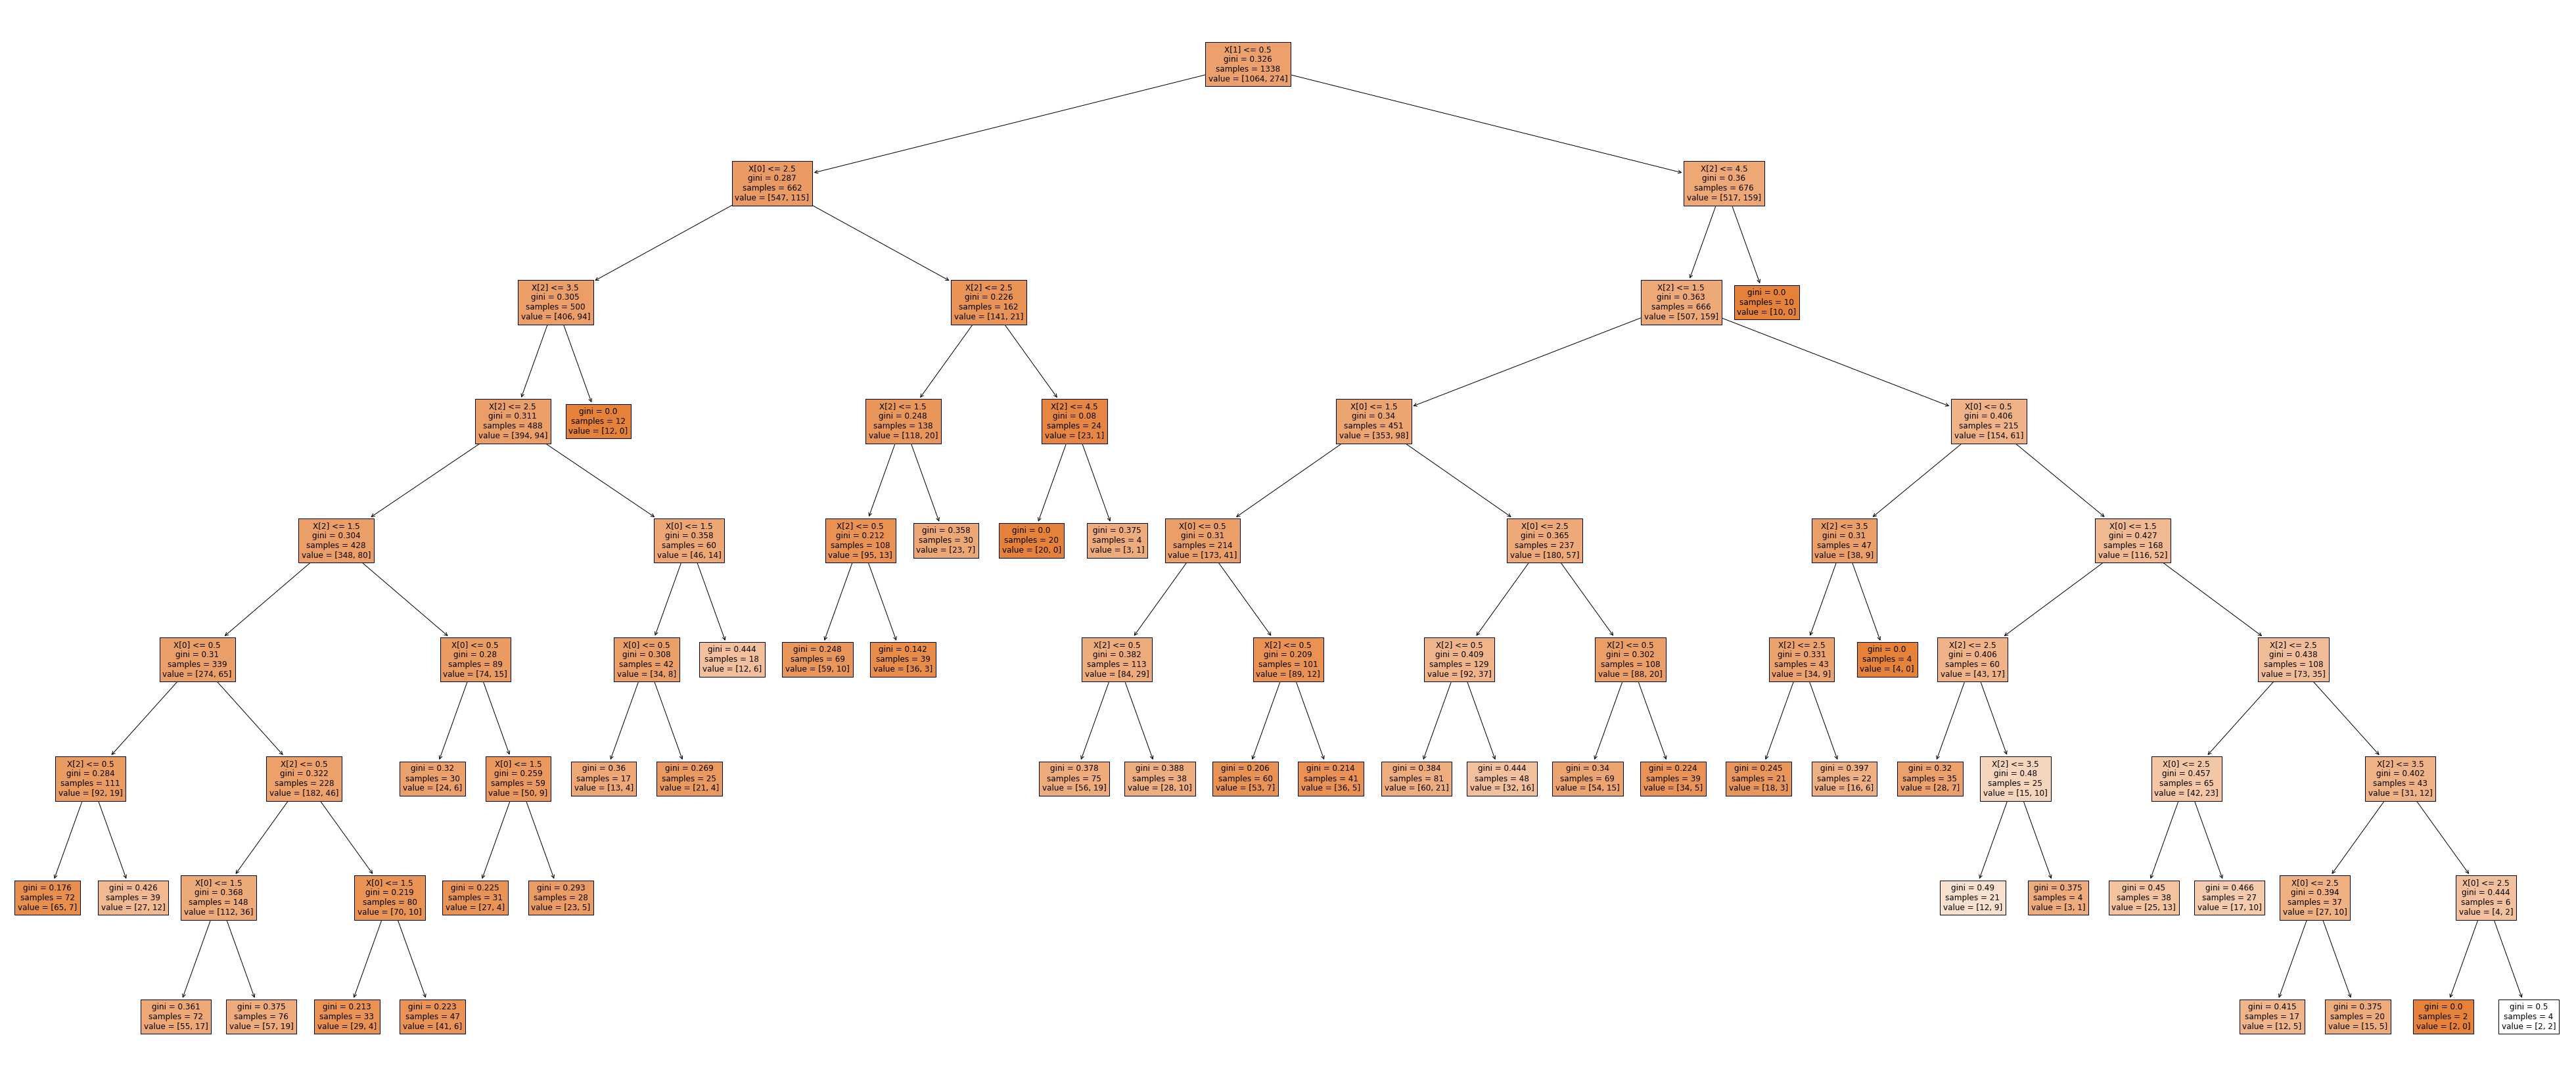

In [29]:
plt.figure(figsize=(70,30))
tree.plot_tree(clf, filled=True)